### SMART thesis fig 5.7:
Shows the distribution of sunspot group areas for the different classes of flares. Let's try to do this - as well as making one for CMEs. Maybe using the CME Halo classes?

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

### SRS sunspot area

In [3]:
# Want data for flare GOES class and SRS area
dfs = df[['goes_flux', 'srs_area']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Converting SRS area into float values
dfs['srs_area'] = dfs['srs_area'].astype(float)

# There are some zero values in area column ---> converting to NaNs 
dfs.srs_area = dfs.srs_area.replace(0, np.nan, regex=True)

# Reindexing
dfs = dfs.reset_index(drop=True)

In [4]:
(dfs == 0).astype(float).sum(axis=0)

goes_flux    0.0
srs_area     0.0
dtype: float64

In [5]:
# Splitting up the different GOES classes --> logging the values for this
dfs.goes_flux = np.log10(dfs.goes_flux)

# Need to split into flare types
a = dfs[ (dfs['goes_flux'] >= -8.0) & (dfs['goes_flux'] <= -7.0) ]  
b = dfs[ (dfs['goes_flux'] > -7.0)  & (dfs['goes_flux'] <= -6.0) ]  
c = dfs[ (dfs['goes_flux'] > -6.0)  & (dfs['goes_flux'] <= -5.0) ]  
m = dfs[ (dfs['goes_flux'] > -5.0)  & (dfs['goes_flux'] <= -4.0) ]  
x = dfs[ (dfs['goes_flux'] > -4.0)  & (dfs['goes_flux'] <= -3.0) ]

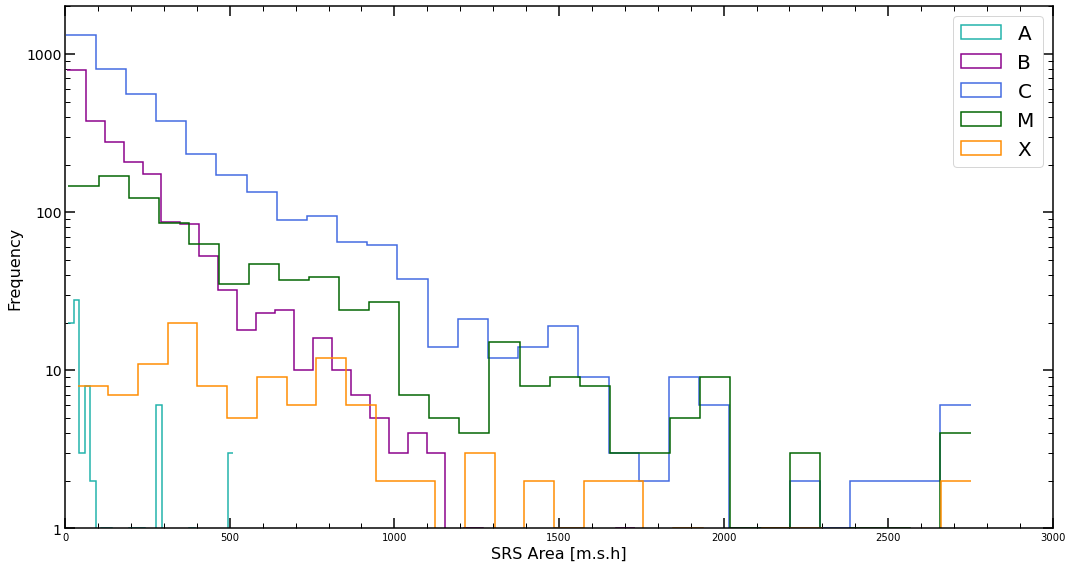

In [6]:
# Plotting SRS sunspot area
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')

na, ba, pa = ax.hist(a.srs_area, 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax.hist(b.srs_area, 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax.hist(c.srs_area, 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax.hist(m.srs_area, 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax.hist(x.srs_area, 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

# Removing the edge lines for each plot
pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_xlim([0,3000])
ax.set_ylim([1,2000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'], fontsize=14)
ax.set_xlabel('SRS Area [m.s.h]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

# Setting minor tick marks
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

# Setting line weight for all axes
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

ax.legend(loc='best', fontsize=20)
plt.tight_layout()
#plt.savefig('srs_area_class.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### SMART sunspot region areas

In [7]:
# Want data for flare GOES class and SRS area
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

In [8]:
(dfsm == 0).astype(float).sum(axis=0)

goes_flux           0.0
smart_total_area    0.0
dtype: float64

In [9]:
# Splitting up the different GOES classes for this new dataframe
dfsm.goes_flux = np.log10(dfsm.goes_flux)

a2 = dfsm[ (dfsm['goes_flux'] >= -8.0) & (dfsm['goes_flux'] <= -7.0) ]  
b2 = dfsm[ (dfsm['goes_flux'] > -7.0)  & (dfsm['goes_flux'] <= -6.0) ]  
c2 = dfsm[ (dfsm['goes_flux'] > -6.0)  & (dfsm['goes_flux'] <= -5.0) ]  
m2 = dfsm[ (dfsm['goes_flux'] > -5.0)  & (dfsm['goes_flux'] <= -4.0) ]  
x2 = dfsm[ (dfsm['goes_flux'] > -4.0)  & (dfsm['goes_flux'] <= -3.0) ]  

In [10]:
# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
a2cm = a2.smart_total_area.values*3.0E16
b2cm = b2.smart_total_area.values*3.0E16
c2cm = c2.smart_total_area.values*3.0E16
m2cm = m2.smart_total_area.values*3.0E16
x2cm = x2.smart_total_area.values*3.0E16

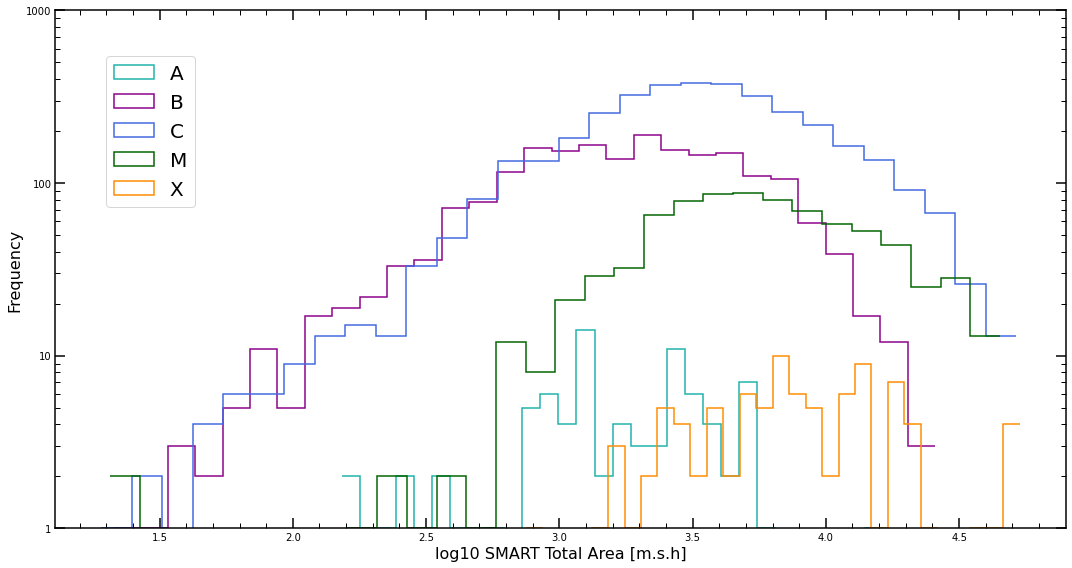

In [11]:
# Plotting SMART sunspot area in m.s.h
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')

na, ba, pa = ax.hist(np.log10(a2.smart_total_area), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax.hist(np.log10(b2.smart_total_area), 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax.hist(np.log10(c2.smart_total_area), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax.hist(np.log10(x2.smart_total_area), 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_ylim([1,1000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'])

ax.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.62], fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_area_class.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

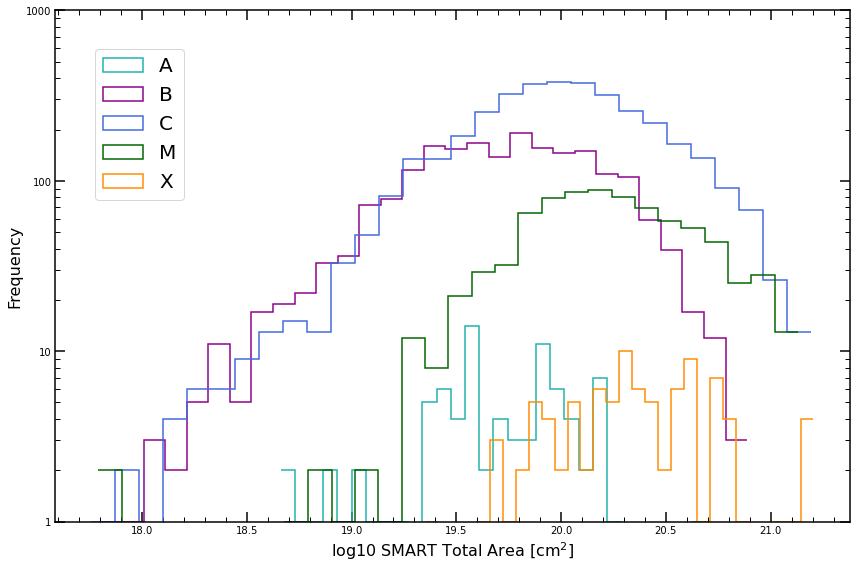

In [12]:
# Plotting SMART sunspot area in cm^2
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

na, ba, pa = ax.hist(np.log10(a2cm), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax.hist(np.log10(b2cm), 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax.hist(np.log10(c2cm), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax.hist(np.log10(m2cm), 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax.hist(np.log10(x2cm), 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_ylim([1,1000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'])

ax.set_xlabel('log10 SMART Total Area [cm$^{2}$]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.63], fontsize=20)
#ax2.legend(loc=[0.045,0.75], fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_acm_log5.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

## CME Halo's

In [13]:
# Want data for flare GOES class and SRS area
dfc = df[['cme_halo', 'smart_total_area']]

# Removing the rows containing any NaN values
dfc = dfc.dropna(how='any')

# Reindexing
dfc = dfc.reset_index(drop=True)

In [14]:
# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
dfc.smart_total_area = dfc.smart_total_area.values*3.0E16

# Splitting up the Halo flags
one   = dfc[ (dfc['cme_halo'] == 1.0) ] 
two   = dfc[ (dfc['cme_halo'] == 2.0) ] 
three = dfc[ (dfc['cme_halo'] == 3.0) ] 
four  = dfc[ (dfc['cme_halo'] == 4.0) ] 

In [15]:
print(len(one.cme_halo) + len(two.cme_halo) + len(three.cme_halo) + len(four.cme_halo))
print(len(dfc.cme_halo))

6681
6681


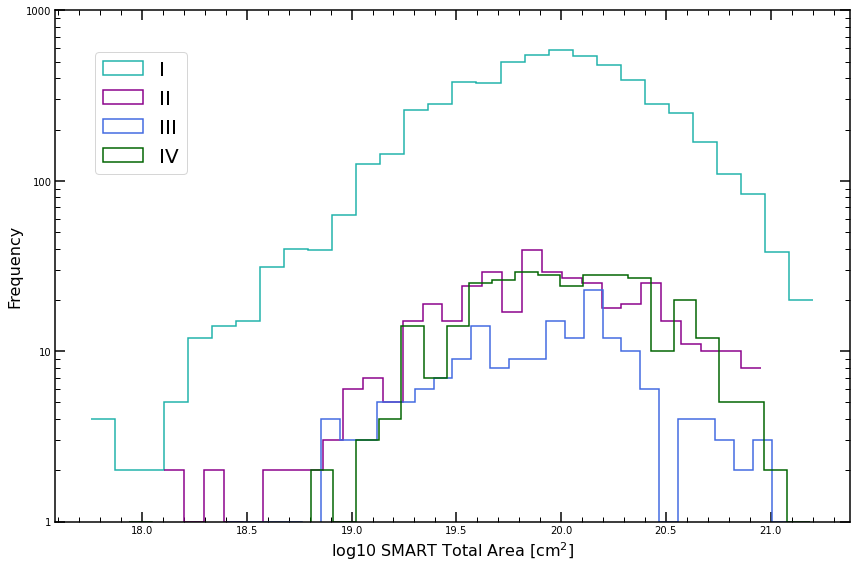

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

na, ba, pa = ax.hist(np.log10(one.smart_total_area),   30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='I')
nb, bb, pb = ax.hist(np.log10(two.smart_total_area),   30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='II')
nc, bc, pc = ax.hist(np.log10(three.smart_total_area), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='III')
nm, bc, pm = ax.hist(np.log10(four.smart_total_area),  30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='IV')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_ylim([1,1000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'])

ax.set_xlabel('log10 SMART Total Area [cm$^{2}$]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.68], fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_halo_acm2.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

## CME Speed, SMART total flux, R-value

In [17]:
dfsp = df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# Converting from m.s.m to cm^2 (1 m.s.h = 3.0E16 cm^2)
dfsp.smart_total_area = dfsp.smart_total_area.values*3.0E16

In [18]:
max(dfsp.cme_speed)

3387.0

In [19]:
# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0)    & (dfsp.cme_speed <= 1000) ]  
s2 = dfsp[ (dfsp.cme_speed > 1000) & (dfsp.cme_speed <= 2000) ]  
s3 = dfsp[ (dfsp.cme_speed > 2000) & (dfsp.cme_speed <= 3000) ]  
s4 = dfsp[ (dfsp.cme_speed > 3000) ]

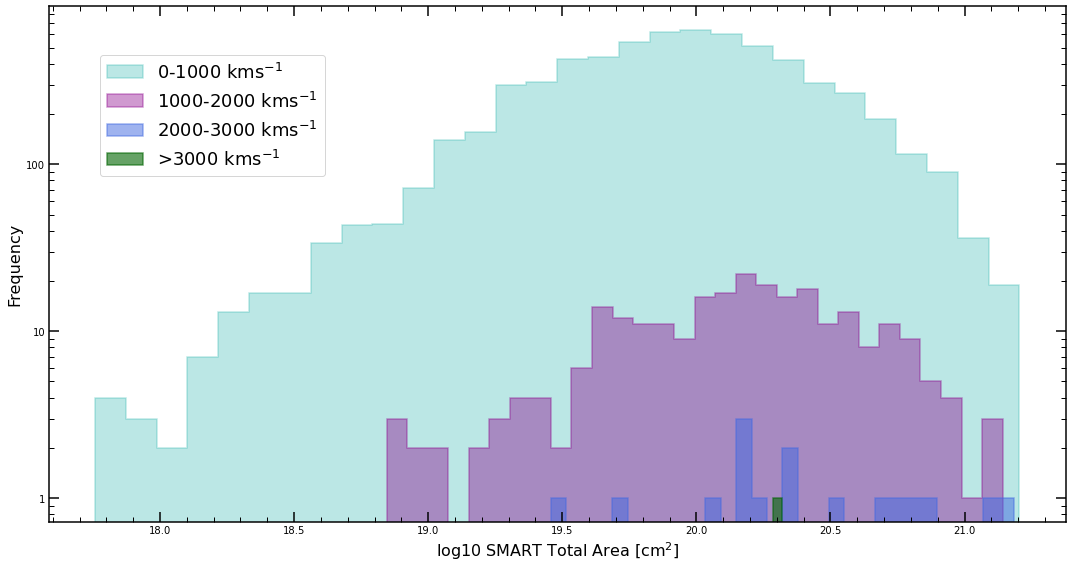

In [20]:
# Plotting sunspot area with relation to CME speed 
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')

na, ba, pa = ax.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax.set_yscale('log')
ax.set_yticks([1, 10, 100])
ax.set_yticklabels(['1', '10', '100'])

ax.set_xlabel('log10 SMART Total Area [cm$^{2}$]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.67], fontsize=18)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_halo_acm.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

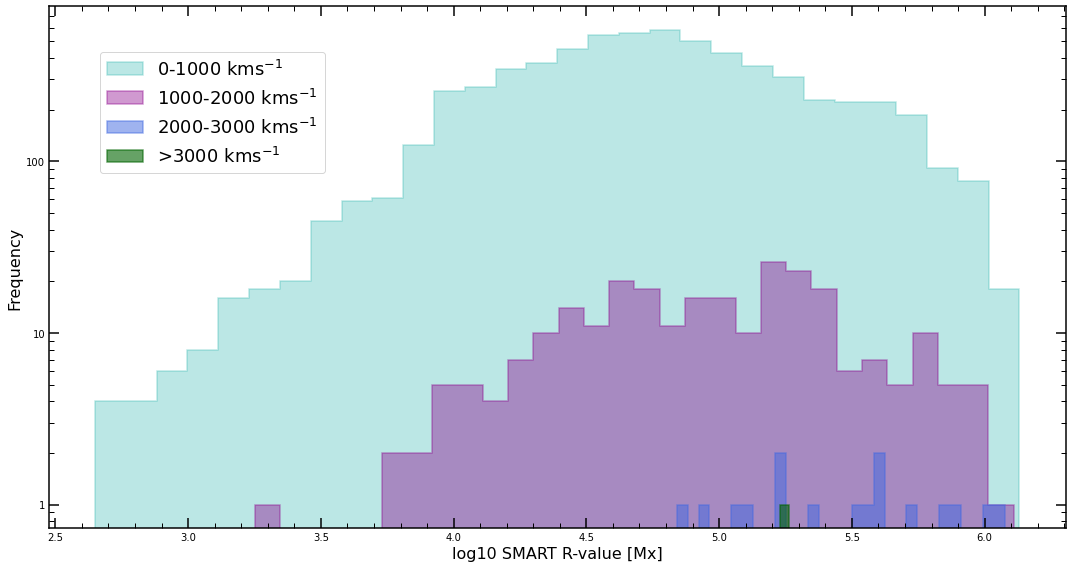

In [21]:
# Plotting r-value with relation to CME speed
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')

na, ba, pa = ax.hist(np.log10(s1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label='0-1000 kms$^{-1}$')
nb, bb, pb = ax.hist(np.log10(s2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label='1000-2000 kms$^{-1}$')
nc, bc, pc = ax.hist(np.log10(s3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='2000-3000 kms$^{-1}$')
nm, bm, pm = ax.hist(np.log10(s4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label='>3000 kms$^{-1}$')

ax.set_yscale('log')
ax.set_yticks([1, 10, 100])
ax.set_yticklabels(['1', '10', '100'])

ax.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.68], fontsize=18)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_r_value.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

In [22]:
# total flux is an object ---> should probably change this in original database!
dfsp.smart_total_flux = dfsp.smart_total_flux.astype(float)

In [23]:
# Splitting up the total flux
f1 = dfsp[ (dfsp.smart_total_flux > 1.0E20) & (dfsp.smart_total_flux <= 1.0E21) ]  
f2 = dfsp[ (dfsp.smart_total_flux > 1.0E21) & (dfsp.smart_total_flux <= 1.0E22) ]  
f3 = dfsp[ (dfsp.smart_total_flux > 1.0E22) & (dfsp.smart_total_flux <= 1.0E23) ]  
f4 = dfsp[ (dfsp.smart_total_flux > 1.0E23) ]

In [24]:
len(f1.smart_total_flux) + len(f2.smart_total_flux) + len(f3.smart_total_flux) + len(f4.smart_total_flux)

6667

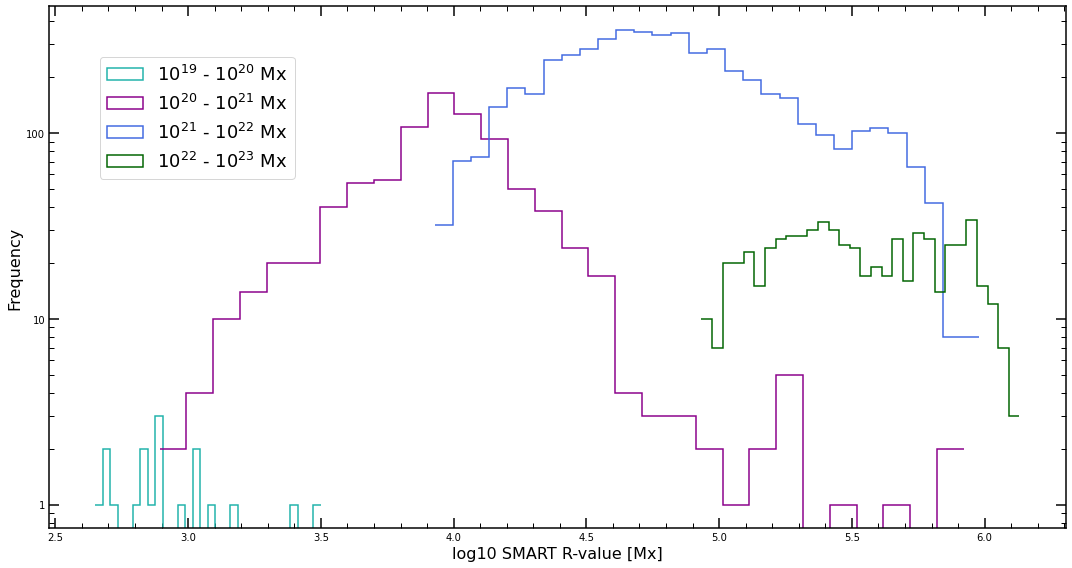

In [25]:
# Plotting r-value with relation to total flux
fig, ax = plt.subplots(figsize=(15, 8), facecolor='white')

"""
# Filled steps
na, ba, pa = ax.hist(np.log10(f1.smart_r_value), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.5, label='10$^{19}$ - 10$^{20}$ Mx')
nb, bb, pb = ax.hist(np.log10(f2.smart_r_value), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.5, label='10$^{20}$ - 10$^{21}$ Mx')
nc, bc, pc = ax.hist(np.log10(f3.smart_r_value), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label='10$^{21}$ - 10$^{22}$ Mx')
nm, bm, pm = ax.hist(np.log10(f4.smart_r_value), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.5, label='10$^{22}$ - 10$^{23}$ Mx')
"""

na, ba, pa = ax.hist(np.log10(f1.smart_r_value), 30, histtype='step',
                         ec='lightseagreen', fc='none', lw=1.5, label='10$^{19}$ - 10$^{20}$ Mx')
nb, bb, pb = ax.hist(np.log10(f2.smart_r_value), 30, histtype='step',
                         ec='darkmagenta', fc='none', lw=1.5, label='10$^{20}$ - 10$^{21}$ Mx')
nc, bc, pc = ax.hist(np.log10(f3.smart_r_value), 30, histtype='step',
                         ec='royalblue', fc='none', lw=1.5, label='10$^{21}$ - 10$^{22}$ Mx')
nm, bm, pm = ax.hist(np.log10(f4.smart_r_value), 30, histtype='step',
                         ec='darkgreen', fc='none', lw=1.5, label='10$^{22}$ - 10$^{23}$ Mx')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_yticks([1, 10, 100])
ax.set_yticklabels(['1', '10', '100'])

ax.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.67], fontsize=18)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_halo_acm.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

### Flare type with R-value --> Fig. 5.8 in SMART thesis

In [26]:
dfq = df[['goes_flux', 'smart_r_value']]

# Removing the rows containing any NaN values
dfq = dfq.dropna(how='any')

# Reindexing
dfq = dfq.reset_index(drop=True)

In [27]:
# Splitting up the different GOES classes for this dataframe
dfq.goes_flux = np.log10(dfq.goes_flux)

aq = dfq[ (dfq['goes_flux'] >= -8.0) & (dfq['goes_flux'] <= -7.0) ]  
bq = dfq[ (dfq['goes_flux'] > -7.0)  & (dfq['goes_flux'] <= -6.0) ]  
cq = dfq[ (dfq['goes_flux'] > -6.0)  & (dfq['goes_flux'] <= -5.0) ]  
mq = dfq[ (dfq['goes_flux'] > -5.0)  & (dfq['goes_flux'] <= -4.0) ]  
xq = dfq[ (dfq['goes_flux'] > -4.0)  & (dfq['goes_flux'] <= -3.0) ]  

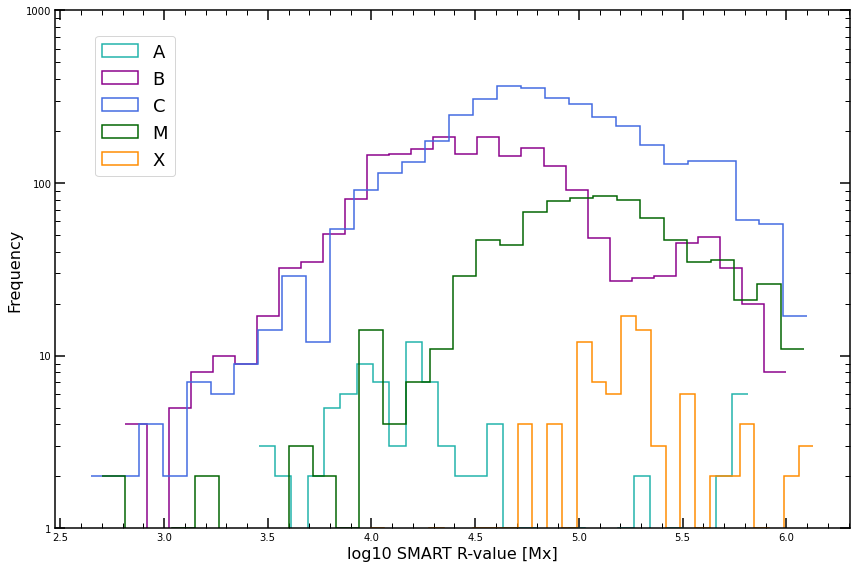

In [28]:
# Plotting r-value with relation to flare type
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

na, ba, pa = ax.hist(np.log10(aq.smart_r_value), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax.hist(np.log10(bq.smart_r_value), 30, ec='darkmagenta', fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax.hist(np.log10(cq.smart_r_value), 30, ec='royalblue', fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax.hist(np.log10(mq.smart_r_value), 30, ec='darkgreen', fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax.hist(np.log10(xq.smart_r_value), 30, ec='darkorange', fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_ylim([1,1000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'])

ax.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.68], fontsize=18)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_r_value2.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

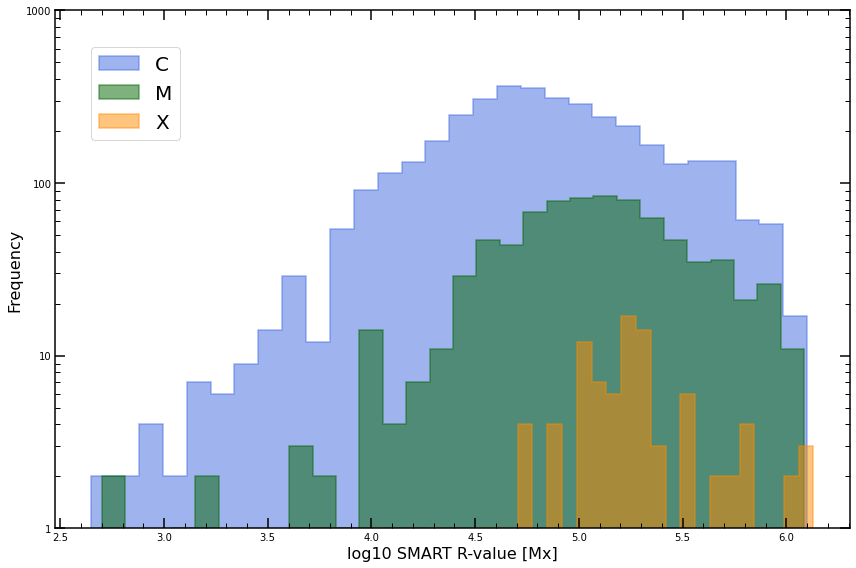

In [29]:
# Plotting again for C, M, X flares only
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

nc, bc, pc = ax.hist(np.log10(cq.smart_r_value), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax.hist(np.log10(mq.smart_r_value), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax.hist(np.log10(xq.smart_r_value), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_ylim([1,1000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'])

ax.set_xlabel('log10 SMART R-value [Mx]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.045,0.75], fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_r_value3.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()

## SMART total flux on x-axis, with flare classes

In [30]:
df2 = df[['goes_flux', 'smart_total_flux']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

In [31]:
# total flux is an object ---> should probably change this in original database!
df2.smart_total_flux = df2.smart_total_flux.astype(float)

In [32]:
# Splitting up the different GOES classes for this dataframe
df2.goes_flux = np.log10(df2.goes_flux)

af = df2[ (df2['goes_flux'] >= -8.0) & (df2['goes_flux'] <= -7.0) ]  
bf = df2[ (df2['goes_flux'] > -7.0) & (df2['goes_flux'] <= -6.0) ]  
cf = df2[ (df2['goes_flux'] > -6.0) & (df2['goes_flux'] <= -5.0) ]  
mf = df2[ (df2['goes_flux'] > -5.0) & (df2['goes_flux'] <= -4.0) ]  
xf = df2[ (df2['goes_flux'] > -4.0) & (df2['goes_flux'] <= -3.0) ]  

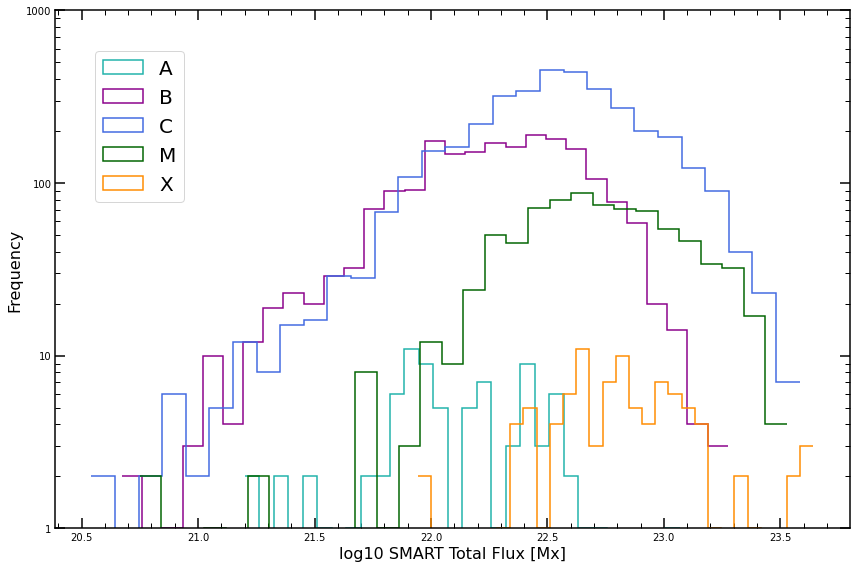

In [33]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white')

na, ba, pa = ax.hist(np.log10(af.smart_total_flux), 30, ec='lightseagreen', fc='none', lw=1.5, histtype='step', label='A')
nb, bb, pb = ax.hist(np.log10(bf.smart_total_flux), 30, ec='darkmagenta',   fc='none', lw=1.5, histtype='step', label='B')
nc, bc, pc = ax.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue',     fc='none', lw=1.5, histtype='step', label='C')
nm, bm, pm = ax.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen',     fc='none', lw=1.5, histtype='step', label='M')
nx, bx, px = ax.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange',    fc='none', lw=1.5, histtype='step', label='X')

pa[0].set_xy(pa[0].get_xy()[1:-1])
pb[0].set_xy(pb[0].get_xy()[1:-1])
pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax.set_yscale('log')
ax.set_ylim([1,1000])
ax.set_yticks([1, 10, 100, 1000])
ax.set_yticklabels(['1', '10', '100', '1000'])

ax.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(loc=[0.05,0.63], fontsize=20)
#ax2.legend(loc=[0.045,0.75], fontsize=20)

ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.tick_params(axis='both', length=10, top=True, right=True, direction='in', width=1.5)
ax.tick_params(axis='both', length=5, top=True, right=True, direction='in', which='minor', width=1)

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)

plt.tight_layout()
#plt.savefig('smart_flux_class.png', dpi=300, bbox_inches="tight", pad_inches=1)
plt.show()